# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [15]:
import numpy as np

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself (you may use linear algebra functions from `scipy` and `numpy`). 

The difference in two subsequent iterations is below tolerance.
Estimations Each Iteration


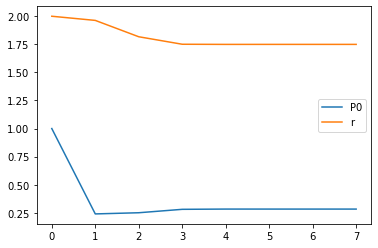

Data and Fit


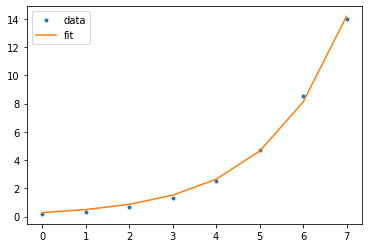

In [91]:
import numpy.linalg as la
import matplotlib.pyplot as plt

def f(t, x):
    x1, x2 = x
    return x1 * x2 ** t

def residual(t, x, y):
    fit = f(t, x)
    return y - fit

def J(t, x):
    x1, x2 = x
    return np.array([-x2 ** t, -x1 * (t * x2 **(t - 1))])

def Gaus_Newton(t, x, y, iterations):
    x_ks = [x]
    for i in range(iterations):
        s_k = la.lstsq(J(t, x_ks[-1]).T,-residual(t, x_ks[-1], y), rcond=None)[0]
        x_ks.append(x_ks[-1] + s_k)
        
        if la.norm(residual(t, x_ks[-1], y)) < 0.000001:
            print("Size of function is below tolerance.")
            break

        if la.norm(x_ks[-1] - x_ks[-2]) < 0.000001:
            print("The difference in two subsequent iterations is below tolerance.")
            break

    if len(x_ks) == iterations + 1:
        print("The number of iterations was reached.")
    return x_ks

x0 = np.array([1.,2.])
t = np.arange(len(data))
x_fit = Gaus_Newton(t,x0,data,10)
y_fit = f(t, x_fit[-1])

print("Estimations Each Iteration")
plt.plot([a[0] for a in x_fit], label="P0")
plt.plot([a[1] for a in x_fit], label="r")
plt.legend(loc=5)
plt.show()

print("Data and Fit")
plt.plot(t, data, '.', label="data")
plt.plot(t, y_fit, label="fit")
plt.legend()
plt.show()

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the results of (a) and (b), showing the data points and the fitted curve. Compare the residuals
(the values of $y_i - f_i(x)$) obtained in (a) and (b) and discuss the differences between the results of the weighted and the unweighted optimization.


(a) Fitted using unweighted least squares


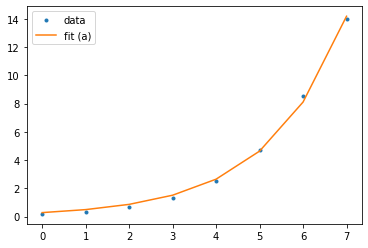

(b) Fitted using weighted least squares


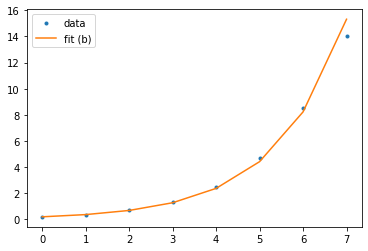

Residuals of both methods


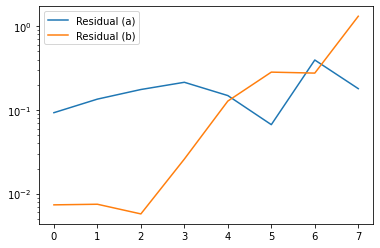

In [98]:
from scipy.optimize import minimize
def F(t, x, sigma):
    return f(t,x)/sigma

def std(y):
    return 0.05 * y

def weighted_lstsq(x, *args):
    t, Y, sigmas = args[0], args[1], args[2]
    norm = la.norm(Y - F(t, x, sigmas))  
    return 0.5 * norm ** 2

sigmas = std(data)
Y = data/sigmas
x0 = np.array([1,2])
x_weighted = minimize(weighted_lstsq, x0, args=(t, Y, sigmas)).x
y_weighted = f(t,x_weighted)

print("(a) Fitted using unweighted least squares")
plt.plot(t, data, '.', label="data")
plt.plot(t, y_fit, label="fit (a)")
plt.legend()
plt.show()

print("(b) Fitted using weighted least squares")
plt.plot(t, data, '.', label="data")
plt.plot(t, y_weighted, label="fit (b)")
plt.legend()
plt.show()

print("Residuals of both methods")
residual_lstsq = np.abs(residual(t, x_fit[-1], data))
residual_weighted = np.abs(residual(t, x_weighted, data))
plt.plot(residual_lstsq, label="Residual (a)")
plt.plot(residual_weighted, label="Residual (b)")
plt.yscale("log")
plt.legend()
plt.show()

The unweighted fit performs worse than the weighted fit for smaller numbers of t and y, but better for the bigger numbers of t and y. The residual of (a) keeps more constant, i.e. the residual does not increase or decrease when t gets bigger. The residual of (b) increases when t gets bigger. Therefore, for bigger t the unweighted least squares is performs better and for smaller t the weighted least squares performs better.

# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$